# 最小値をプログラムで求める

対象の関数  
$
y = 0.01x^4 - 3x^2 + 8x
$

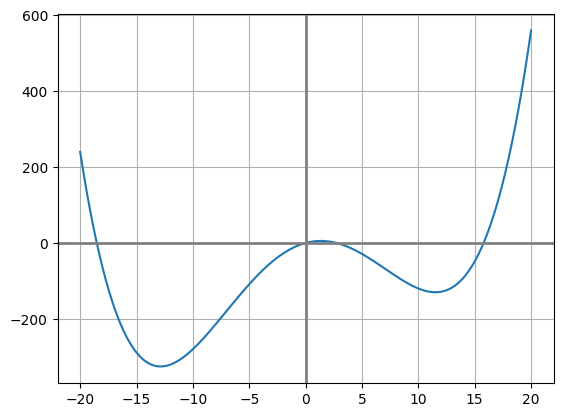

In [42]:
import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline

# -4から4までのxを100個用意する
x = np.linspace(-20, 20, 1000)

# これが対象の関数
y = 0.01*x**4 - 3*x**2 + 8*x

# これ以降はグラフの描画処理
plt.plot(x, y)
plt.grid()
plt.axhline(0, linewidth=2, color="gray")
plt.axvline(0, linewidth=2, color="gray")
plt.show()


微分する  
$
y' = 0.04x^3 - 6x + 8
$  

傾きが0($y = 0$)を求める  
$
0.04x^3 - 6x + 8 = 0
$  

こんな式は解くの面倒なので適当なサイトで解を求めた  
$x_1 = -12.866404255744$  
$x_2 = 1.349725842315$  
$x_3 = 11.516678413429$  


In [46]:
xx = -12.866404255744
0.04*(xx)**3 - 6*xx + 8

4.973799150320701e-12

In [47]:
xx = 1.349725842315
0.04*(xx)**3 - 6*xx + 8

-2.184918912462308e-13

In [48]:
xx = 11.516678413429
0.04*(xx)**3 - 6*xx + 8

-3.929301328753354e-12

指数表示になっているが十分に0に近いので良しとする  

グラフから$x = -12.866...$が最小値と見えるので値を計算する

In [50]:
xx = -12.866404255744
0.01*xx**4 - 3*xx**2 + 8*xx

-325.51496324282095

グラフと見た感じ正しそうな値である  
微分で得られた3次方程式を代数的に解いていないけど、微分した結果が0を示す場所が最大 or 最小(極大 or 極小だっけ？)という求め方  

ここまでは数学のお話  

プログラムで解いていくよ

In [28]:
# 微分して傾きを求める
def dif(x):
    # delta
    d = 0.0001

    #今回対象としてる関数の値を計算
    y1 = 0.01*x**4 - 3*x**2 + 8*x
    y2 = 0.01*(x+d)**4 - 3*(x+d)**2 + 8*(x+d)
    return (y2 - y1)/d
    
# xの初期値と繰り返しの回数が引数
def get_value(mx, max):
    # 初期化
    g = 0
    og = 0
    mv = 0.001

    for n in range(max):
        # 微分する
        g = dif(mx)

        # 傾きの負号によってmxの値をmv分動かす
        if g < 0:
            mx = mx + mv
        else:
            mx = mx - mv
        og = g
        if n % 500 == 0:
            # 途中経過
            # 繰り返し, mx, 前回の傾き, 今回の傾き, 前回と今回の差
            print(n, mx, og, g, abs(og - g))
    return mx

# 初期値 = -20からxを動かして最小値を求める(8000回繰り返す)
get_value(-20, 8000)

0 -19.999 -191.99790000612893 -191.99790000612893 0.0
500 -19.498999999999388 -171.59301850625752 -171.59301850625752 0.0
1000 -18.998999999998777 -152.35813400778397 -152.35813400778397 0.0
1500 -18.498999999998166 -134.2632465050997 -134.2632465050997 0.0
2000 -17.998999999997555 -117.27835600737535 -117.27835600737535 0.0
2500 -17.498999999996943 -101.37346250672863 -101.37346250672863 0.0
3000 -16.998999999996332 -86.5185660089196 -86.5185660089196 0.0
3500 -16.49899999999572 -72.68366650492908 -72.68366650492908 0.0
4000 -15.998999999995114 -59.83876400648569 -59.83876400648569 0.0
4500 -15.498999999995391 -47.953858507412406 -47.953858507412406 0.0
5000 -14.998999999995668 -36.99895000579545 -36.99895000579545 0.0
5500 -14.498999999995945 -26.94403850625804 -26.94403850625804 0.0
6000 -13.998999999996222 -17.75912400660218 -17.75912400660218 0.0
6500 -13.4989999999965 -9.41420650406144 -9.41420650406144 0.0
7000 -12.998999999996776 -1.8792860061012107 -1.8792860061012107 0.0
7500

-12.86599999999685

数学で求めた値と大体同じになった

In [32]:
# 初期値 = -1からxを動かして最小値を求める(8000回繰り返す)
get_value(-1, 8000)

0 -1.001 13.959705999599947 13.959705999599947 0.0
500 -1.5009999999999448 16.864713499415984 16.864713499415984 0.0
1000 -2.0009999999998898 19.679723999210808 19.679723999210808 0.0
1500 -2.5009999999998347 22.37473749900687 22.37473749900687 0.0
2000 -3.0009999999997796 24.91975399891544 24.91975399891544 0.0
2500 -3.5009999999997246 27.284773498621462 27.284773498621462 0.0
3000 -4.00099999999967 29.439795998484897 29.439795998484897 0.0
3500 -4.500999999999837 31.35482149815516 31.35482149815516 0.0
4000 -5.001000000000004 32.999849997992214 32.999849997992214 0.0
4500 -5.501000000000171 34.34488149778758 34.34488149778758 0.0
5000 -6.001000000000338 35.35991599761701 35.35991599761701 0.0
5500 -6.501000000000505 36.01495349727202 36.01495349727202 0.0
6000 -7.001000000000672 36.279993996686244 36.279993996686244 0.0
6500 -7.501000000000839 36.1250374970723 36.1250374970723 0.0
7000 -8.001000000001005 35.52008399680062 35.52008399680062 0.0
7500 -8.501000000000728 34.4351334959469

-9.000000000000451

ん～、傾きが-20開始に比べ緩やかなので8000回では収束しない  
繰り返しの回数を増やす

In [33]:
# 初期値 = -1からxを動かして最小値を求める(16000回繰り返す)
get_value(-1, 16000)

0 -1.001 13.959705999599947 13.959705999599947 0.0
500 -1.5009999999999448 16.864713499415984 16.864713499415984 0.0
1000 -2.0009999999998898 19.679723999210808 19.679723999210808 0.0
1500 -2.5009999999998347 22.37473749900687 22.37473749900687 0.0
2000 -3.0009999999997796 24.91975399891544 24.91975399891544 0.0
2500 -3.5009999999997246 27.284773498621462 27.284773498621462 0.0
3000 -4.00099999999967 29.439795998484897 29.439795998484897 0.0
3500 -4.500999999999837 31.35482149815516 31.35482149815516 0.0
4000 -5.001000000000004 32.999849997992214 32.999849997992214 0.0
4500 -5.501000000000171 34.34488149778758 34.34488149778758 0.0
5000 -6.001000000000338 35.35991599761701 35.35991599761701 0.0
5500 -6.501000000000505 36.01495349727202 36.01495349727202 0.0
6000 -7.001000000000672 36.279993996686244 36.279993996686244 0.0
6500 -7.501000000000839 36.1250374970723 36.1250374970723 0.0
7000 -8.001000000001005 35.52008399680062 35.52008399680062 0.0
7500 -8.501000000000728 34.4351334959469

-12.865999999998309

いい感じ  
ただ、今回の方法(勾配下降法)だと初期値によっては局所解にはまる  
(今回だと$x = 11.5$付近)

In [31]:
# 初期値 = 20からxを動かして最小値を求める(10000回繰り返す)
get_value(20, 10000)

0 19.999 208.00210000970765 208.00210000970765 0.0
500 19.498999999999388 187.59698150915938 187.59698150915938 0.0
1000 18.998999999998777 168.36186600812653 168.36186600812653 0.0
1500 18.498999999998166 150.26675350554797 150.26675350554797 0.0
2000 17.998999999997555 133.2816440057627 133.2816440057627 0.0
2500 17.498999999996943 117.37653750714117 117.37653750714117 0.0
3000 16.998999999996332 102.52143400379055 102.52143400379055 0.0
3500 16.49899999999572 88.6863335060184 88.6863335060184 0.0
4000 15.998999999995114 75.84123600722137 75.84123600722137 0.0
4500 15.498999999995391 63.956141505912 63.956141505912 0.0
5000 14.998999999995668 53.001050005434536 53.001050005434536 0.0
5500 14.498999999995945 42.94596150515417 42.94596150515417 0.0
6000 13.998999999996222 33.76087600400979 33.76087600400979 0.0
6500 13.4989999999965 25.415793506624595 25.415793506624595 0.0
7000 12.998999999996776 17.880714004547826 17.880714004547826 0.0
7500 12.498999999997054 11.125637505244867 11.1

11.515999999997598

**見事にはまったwww**

1度の試行では局所解の可能性があるので、初期値をランダムにして複数回実行してみる等の工夫が必要っぽいね  
(AI研究ではmxの移動に加速度を考えて局所解を乗り越えやすくしたりする等の工夫があるらしいよ)